In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# 1. Basic Operations

**Q1.** Write code to create a DataFrame from a dictionary containing student names and their scores in three subjects (Math, Science, English).<br/>
* Write a code to add a new column `Total Marks`, which calculates the total marks for each student.
* Print first five rows of the DataFrame and summary statistics using the `describe()` method.


```python
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}
```

In [9]:
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}
data = pd.DataFrame(data)
data['Total Marks'] = data['Math'] + data['Science'] + data['English']
print(data.head())
data.describe()

       Name  Math  Science  English  Total Marks
0     Virat    90       85       78          253
1     Dhoni    80       88       85          253
2     Rohit    85       90       82          257
3    Sachin    70       75       90          235
4  Gavaskar    95       92       88          275


,Math,Science,English,Total Marks
count,5.000000,5.000000,5.000000,5.000000
mean,84.000000,86.000000,84.600000,254.600000
std,9.617692,6.670832,4.774935,14.240786
min,70.000000,75.000000,78.000000,235.000000
25%,80.000000,85.000000,82.000000,253.000000
50%,85.000000,88.000000,85.000000,253.000000
75%,90.000000,90.000000,88.000000,257.000000
max,95.000000,92.000000,90.000000,275.000000


**Q2.** Create a dummy CSV file named students.csv containing the following columns: Name, Age, Gender, and Marks (atleast 5 entries). Perform the following tasks:

- Load the file into a DataFrame using Pandas.
- Display the last 3 rows of the DataFrame.
- Print the total number of rows and columns in the DataFrame.

In [10]:
df = pd.read_csv(r"C:\Users\Aayush Kuloor\IITGN\ES 114\Labs\students.csv")
num_rows, num_cols = df.shape
print(f"Number of rows = {num_rows}")
print(f"Number of columns = {num_cols}")
df.tail(3)

Number of rows = 5
Number of columns = 4


,Name,Age,Gender,Marks
2,Bharat,18,Male,87
3,Aarushi,17,Female,85
4,Thushar,18,Male,94


**Q3.** Create and populate a DataFrame with columns Employee_ID, Name, Department, and Salary. Now perform the following:

- Add a new column Bonus where each employee gets 10% of their Salary.
- Increase the Salary of all employees in the IT department by 20%.
- Drop the Department column from the DataFrame.


In [12]:
df = pd.DataFrame({
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107],
    'Name': ['Bheem', 'Chutki', 'Raju', 'Jaggu', 'Kalia', 'Dholu', 'Bholu'],
    'Department': ['Finance', 'HR', 'IT', 'HR', 'Finance', 'IT', 'Finance'],
    'Salary': [70000, 50000, 60000, 45000, 65000, 60000, 75000]
})

bonus_percentage = 10
df.eval('Bonus = 0.01 * @bonus_percentage * Salary', inplace=True)
print(f'After adding bonus:\n{df}\n')

salary_hike = 20
it_mask = df['Department'] == 'IT'
df.loc[it_mask, 'Salary'] *= 1 + 0.01 * salary_hike
print(f"After IT increment:\n{df}\n")

df.drop('Department', axis=1, inplace=True)
print(f'After dropping \'Department\':\n{df}')

After adding bonus:
   Employee_ID    Name Department  Salary   Bonus
0          101   Bheem    Finance   70000  7000.0
1          102  Chutki         HR   50000  5000.0
2          103    Raju         IT   60000  6000.0
3          104   Jaggu         HR   45000  4500.0
4          105   Kalia    Finance   65000  6500.0
5          106   Dholu         IT   60000  6000.0
6          107   Bholu    Finance   75000  7500.0

After IT increment:
   Employee_ID    Name Department  Salary   Bonus
0          101   Bheem    Finance   70000  7000.0
1          102  Chutki         HR   50000  5000.0
2          103    Raju         IT   72000  6000.0
3          104   Jaggu         HR   45000  4500.0
4          105   Kalia    Finance   65000  6500.0
5          106   Dholu         IT   72000  6000.0
6          107   Bholu    Finance   75000  7500.0

After dropping 'Department':
   Employee_ID    Name  Salary   Bonus
0          101   Bheem   70000  7000.0
1          102  Chutki   50000  5000.0
2          1

# 2. Indexing and Slicing

**Q1.** You are given a data about employees' performance:

```
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}
```
Using boolean indexing, select employees who meet all of the following conditions:

- Belong to either 'HR' or 'IT' departments.
- Have a performance rating greater than or equal to 8.0.
- Earn a salary less than 55,000 or have been with the company for at least 4 years.


In [13]:
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}

data = pd.DataFrame(data)
mask_performance = data['Performance_Rating'] >= 8
mask_department = (data['Department'] == 'HR') | (data['Department'] == 'IT')
mask_salary_and_years = (data['Salary'] < 55000) | (data['Years_at_Company'] >= 4)
mask = mask_performance & mask_department & mask_salary_and_years
print(data[mask])

  Employee Department  Salary  Performance_Rating  Years_at_Company
0       E1         HR   50000                 8.2                 5
4       E5         HR   52000                 8.0                 4


**Q2.** Slicing Rows and Columns

```
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
```

Use slicing to select the following:

- The last 3 rows of the DataFrame.
- All columns except 'Stock' and 'Rating' from the first 3 rows.

In [14]:
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
data = pd.DataFrame(data)

print(f'The last 3 rows of the dataframe are:\n{data.tail(3)}\n')

filtered_cols = ['Stock', 'Rating']
filtered_data = data.loc[ : 2, ~data.columns.isin(filtered_cols)]
print(f'All columns except \'Stock\' and \'Rating\' from the first 3 rows:\n{filtered_data}')

The last 3 rows of the dataframe are:
      Product  Price  Stock  Rating
2      Tablet    300     50     3.8
3     Monitor    150     10     4.8
4  Headphones     50    100     4.0

All columns except 'Stock' and 'Rating' from the first 3 rows:
  Product  Price
0  Laptop    800
1   Phone    400
2  Tablet    300


**Q3.** Label-based Indexing with `.loc[]` and `.iloc[]`

```
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}
```

Using .loc[] and .iloc[], perform the following tasks:

- Select the row corresponding to 'Tom' using label-based indexing.
- Select the first two rows and the 'Salary' and 'Department' columns using position-based indexing.

In [21]:
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT'],
}
data = pd.DataFrame(data)
data.set_index('Name', inplace=True)

print(f'\'Tom\' using label-based indexing:\n{data.loc['Tom']}\n')
data.reset_index(inplace=True)

selected_cols = ['Salary', 'Department']
selected_data = data.loc[ : 1, data.columns.isin(selected_cols)]
print(f'First two rows and the \'Salary\' and \'Department\' columns:\n{selected_data}')

'Tom' using label-based indexing:
Age              40
Salary        75000
Department       IT
Name: Tom, dtype: object

First two rows and the 'Salary' and 'Department' columns:
   Salary Department
0   50000         HR
1   60000    Finance


# 3. GroupBy and Aggregations


**Q1.** You have a dataset of students' test scores. The dataset has the following columns:

* StudentID: Unique ID of the student.
* Subject: The subject of the test.
* Score: The score obtained (out of 100).
```
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})
```

* Write a function to calculate the average score for each student. Use this function to group the data by StudentID and find the average score.

In [27]:
data = pd.DataFrame({
    "StudentID": [1, 2, 3, 2, 3, 1],
    "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
    "Score": [85, 90, 78, 88, 92, 95]
})

def get_avg_score(df):
    return df.groupby('StudentID')[['Score']].mean()

print(get_avg_score(data))

           Score
StudentID       
1           90.0
2           89.0
3           85.0




**Q2.** Create  a dataset of retail sales with a hierarchical index consisting of `Region` and `StoreID`. The dataset contains the following columns:

* ProductCategory: The category of the product sold (e.g., Electronics, Clothing)

* Sales: The amount of sales made

Group the data by respective level indices  and calculate:

* Total sales in each region.
* Average sales in each store .


In [61]:
df = pd.DataFrame({
    'Region': ['Asia', 'USA', 'Asia', 'USA', 'Asia', 'Asia', 'USA'],
    'StoreID': [101, 102, 103, 102, 101, 103, 102],
    'ProductCategory': ['Electronics', 'Clothing', 'Books', 'Electronics', 'Grocery', 'Clothing', 'Books'],
    'Sales': [5000, 3000, 4000, 3500, 4500, 3200, 4700]
})
df.set_index(['Region', 'StoreID'], inplace=True)

sales_per_region = df.groupby('Region')['Sales'].sum()
print(f'Sales per region:\n{sales_per_region}\n')

average_sales_per_store = df.groupby('StoreID')['Sales'].mean()
print(f'Average sales per store:\n{average_sales_per_store}\n')

Sales per region:
Region
Asia    16700
USA     11200
Name: Sales, dtype: int64

Average sales per store:
StoreID
101    4750.000000
102    3733.333333
103    3600.000000
Name: Sales, dtype: float64



**Q3.** You are given a DataFrame `df_orders` as follows:

```
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})
```
- Group the data by "`Category`" and compute:
  - Total revenue `(Price * Quantity)`.
  - Total discounts given` (Discount * Quantity)`.

- For each category find the followng:
  * The order with the highest revenue.
  * The average discount per order.




In [42]:
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})

df_orders["Sale Price"] = df_orders["Price"] - df_orders["Discount"]
df_orders["Revenue"] = df_orders["Sale Price"] * df_orders["Quantity"]
df_orders["Order_Discount"] = df_orders["Discount"] * df_orders["Quantity"]
df_orders["Total Revenue"] = df_orders["Price"] * df_orders["Quantity"]

print(f"{df_orders}\n")
cat_df = df_orders.groupby("Category")
total_revenue = cat_df["Total Revenue"].sum()
total_discount = cat_df["Order_Discount"].sum()

print(f"Total Revenue by Category: \n{total_revenue}\n")
print(f"Total Discounts by Category: \n{total_discount}\n")

highest_revenues = cat_df["Revenue"].idxmax()
highest_revenue_orders = df_orders.loc[highest_revenues, ["Category", "Order_ID", "Revenue"]]
print(f"Orders with Highest Revenue by Category:\n{highest_revenue_orders}\n")

avg_discount = cat_df["Discount"].mean()
print(f"Average Discount per Order by Category: \n{avg_discount}")

      Category Order_ID  Price  Discount  Quantity  Sale Price  Revenue  \
0  Electronics       O1   1000        50         1         950      950   
1  Electronics       O2    500        25         2         475      950   
2     Clothing       O3    100        10         3          90      270   
3     Clothing       O4    200        20         1         180      180   
4    Groceries       O5     50         5         4          45      180   
5    Groceries       O6     60         6         5          54      270   

   Order_Discount  Total Revenue  
0              50           1000  
1              50           1000  
2              30            300  
3              20            200  
4              20            200  
5              30            300  

Total Revenue by Category: 
Category
Clothing        500
Electronics    2000
Groceries       500
Name: Total Revenue, dtype: int64

Total Discounts by Category: 
Category
Clothing        50
Electronics    100
Groceries       50


# 4. Handling Missing Data

You are provided with a dataset, `numeric_df`, containing numeric features from the Titanic dataset. Your task is to explore and handle the missing data systematically.



**Q1.** **Load and Inspect the Data**
- Run the cell below to get the dataset `numeric_df`.
- Display the first 5 rows of the dataset.
- Create a **heatmap** to visualize where the missing values occur.
- Count the missing values in each column and report them (also, plot them).
- Drop the column with more than 60 percent `NaN` values. Why?


In [78]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Introducing missing values in the 'pclass' column
np.random.seed(42)
pclass_nan_indices = np.random.choice(numeric_df.index, size=int(0.05 * len(numeric_df)), replace=False)
numeric_df.loc[pclass_nan_indices, 'pclass'] = np.nan

# Introducing missing values in the 'parch' column
parch_nan_indices = np.random.choice(numeric_df.index, size=int(0.70 * len(numeric_df)), replace=False)
numeric_df.loc[parch_nan_indices, 'parch'] = np.nan

In [79]:
numeric_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3.0,22.0,1,0.0,7.2500
1,1,1.0,38.0,1,NaN,71.2833
2,1,3.0,26.0,0,NaN,7.9250
3,1,1.0,35.0,1,0.0,53.1000
4,0,3.0,35.0,0,0.0,8.0500


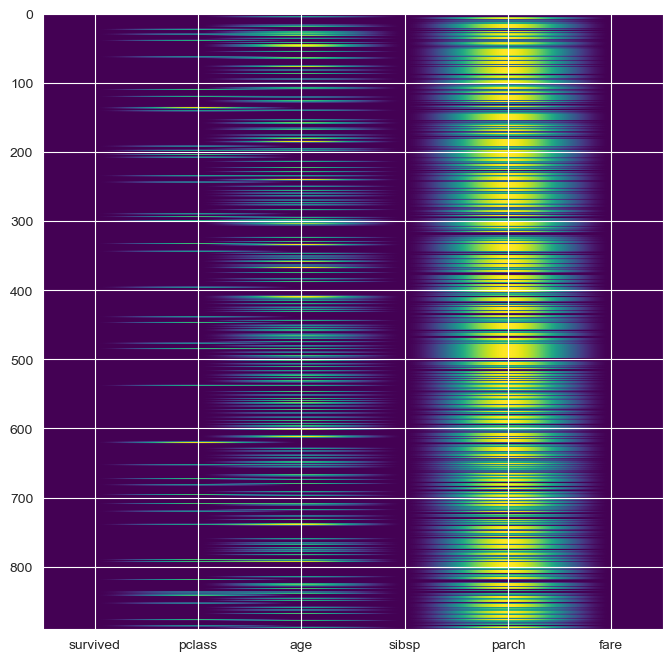

In [80]:
missing_vals = numeric_df.isnull()

fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(missing_vals, cmap = 'viridis', aspect = 'auto')
ax.set_xticks(range(len(numeric_df.columns)), labels = numeric_df.columns)
plt.show()


Counts of the Missing Values in Each Column: 
survived      0
pclass       44
age         177
sibsp         0
parch       623
fare          0
dtype: int64



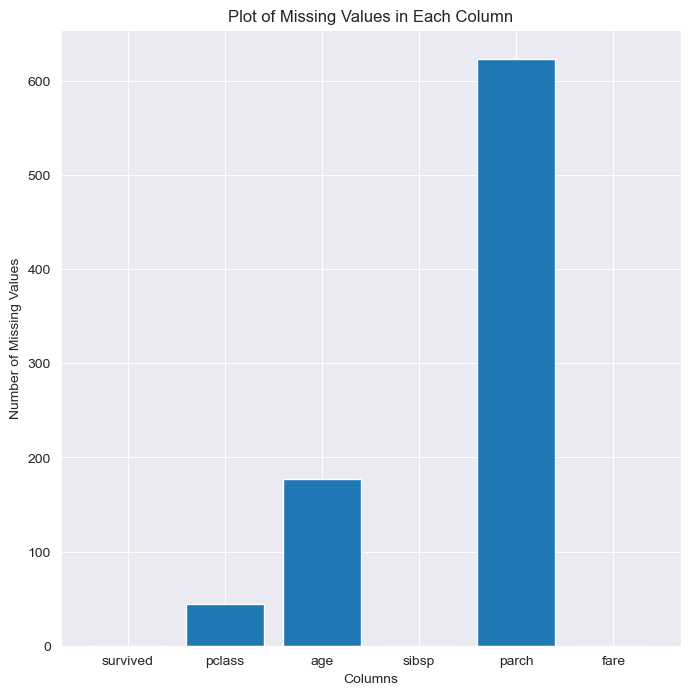

In [81]:
missing_per_col = numeric_df.isnull().sum()
print(f'Counts of the Missing Values in Each Column: \n{missing_per_col}\n')

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(numeric_df.columns, missing_per_col, align='center')
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Missing Values')
ax.set_title('Plot of Missing Values in Each Column')
plt.show()

In [82]:
percentage_missing_per_col = numeric_df.isnull().mean() * 100
mask = percentage_missing_per_col[percentage_missing_per_col > 60]
numeric_df.drop(mask.index, axis = 1, inplace=True)

print('We are discarding the columns with more than 60% NaN values because these columns provide us little to no information. They are also a waste of computational resources because we are not gaining anything of value from it. They can also lead to less accurate predictions when we train a machine learning model using datasets with such a high percentage of NaN values.')

numeric_df

We are discarding the columns with more than 60% NaN values because these columns provide us little to no information. They are also a waste of computational resources because we are not gaining anything of value from it. They can also lead to less accurate predictions when we train a machine learning model using datasets with such a high percentage of NaN values.


,survived,pclass,age,sibsp,fare
0,0,3.0,22.0,1,7.2500
1,1,1.0,38.0,1,71.2833
2,1,3.0,26.0,0,7.9250
3,1,1.0,35.0,1,53.1000
4,0,3.0,35.0,0,8.0500
...,...,...,...,...,...
886,0,NaN,27.0,0,13.0000
887,1,1.0,19.0,0,30.0000
888,0,3.0,NaN,1,23.4500
889,1,1.0,26.0,0,30.0000




**Q2** **Handle Missing Values**
- For the `pclass` column, use **mode imputation** to fill the missing values.
- Explain why mode imputation is appropriate for this column.

- How would you impute the values for the column `age`. Why?


In [134]:
# Mode imputation: replacing NaN values with the mode of the available data
mode_pclass = numeric_df['pclass'].mode()[0]
numeric_df_imputed = numeric_df.fillna(value = {'pclass': mode_pclass})

print('Mode imputation is appropriate for pclass, since it is always an integer, unlike the mean. Having non integer values for passenger class doesn\'t make sense. The median might not be indicative of the most appropriate value to be imputed. In addition to this, passenger class has only 3 possible values, which makes it even more suitable for mode imputation.\n')

print('I would impute the values of the column \'age\' with its median, since the median has a lower tendency to be skewed by the outliers. Unlike the median, the mean can skewed by outliers, and the mode can be skewed if there are many entries with the same value.\n\n')

Mode imputation is appropriate for pclass, since it is always an integer, unlike the mean. Having non integer values for passenger class doesn't make sense. The median might not be indicative of the most appropriate value to be imputed. In addition to this, passenger class has only 3 possible values, which makes it even more suitable for mode imputation.

I would impute the values of the column 'age' with its median, since the median has a lower tendency to be skewed by the outliers. Unlike the median, the mean can skewed by outliers, and the mode can be skewed if there are many entries with the same value.





**Q3** **Analyze Results**
- Compare the dataset before and after imputation:
  - Count the missing values after imputation.
  - Calculate the **mean** of all numeric columns before and after imputation.

In [87]:
count_missing_after_imputation = numeric_df_imputed.isnull().sum()
print(f'Missing values after imputation: \n{count_missing_after_imputation}\n')

mean_before_imputation = numeric_df.mean()
mean_after_imputation = numeric_df_imputed.mean()
print(f'Mean of all numeric columns before imputation:\n{mean_before_imputation}\n')
print(f'Mean of all numeric columns after imputation:\n{mean_after_imputation}')


Missing values after imputation: 
survived      0
pclass        0
age         177
sibsp         0
fare          0
dtype: int64

Mean of all numeric columns before imputation:
survived     0.383838
pclass       2.305785
age         29.699118
sibsp        0.523008
fare        32.204208
dtype: float64

Mean of all numeric columns after imputation:
survived     0.383838
pclass       2.340067
age         29.699118
sibsp        0.523008
fare        32.204208
dtype: float64


# 5. Pandas: Merging Joining and Concatenation

**Q1.** You have two DataFrames `df1` and `df2` where `df1` has a column `student_id` and `df2` has a column `student_id` along with `grade`, how would you merge these DataFrames on `student_id` to keep only the rows present in both DataFrames? Show output of the merge.

```python
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
```


In [88]:
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

merged_df = pd.merge(df1, df2, how = 'inner', on = 'student_id')
merged_df

,student_id,name,grade
0,2,Bob,A
1,3,Charlie,B
2,4,David,C


**Q2.** If you are provided with two DataFrames, employees and departments with `employee_id` as the index, how would you join them such that all rows from the employees DataFrame are kept, even if there is no matching department record? (you may assume employees have 2nd column as `employee_name` and departments have 2nd column as `department_name`, and randomly assign its data)

```python
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)
```


In [91]:
employees_data = pd.DataFrame({
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
})
departments_data = pd.DataFrame({
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
})

joined_df = employees_data.merge(departments_data, how = 'left', on = 'employee_id')
print('I would use "how = \'left\'" so that all rows from the employees dataframe are kept, and NaN is assigned as the department if there is no matching department record.\n')
joined_df

I would use "how = 'left'" so that all rows from the employees dataframe are kept, and NaN is assigned as the department if there is no matching department record.



,employee_id,employee_name,department_name
0,1,Alice,D
1,2,Bob,A
2,3,Charlie,B
3,4,David,C


**Q3**. Given two DataFrames `df_a` and `df_b` with the same columns, how would you concatenate them vertically, resetting the index so it starts from zero in the combined DataFrame? (you may assume both dataframes have 2 columns each, and randomly assign its data)

```python
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)
```

In [93]:
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}
df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)

concatenated_df = pd.concat([df_a, df_b])
concatenated_df.reset_index(drop = True, inplace = True)
concatenated_df

,student_id,name
0,1,Alice
1,2,Bob
2,3,Charlie
3,4,David
4,5,Anish
5,6,Divakar
6,7,Vaibhav
7,8,Tanvi


# 6. Pandas: Advanced Operations (Evaluation and Query)




You are provided with the dataset, `iris`, which contains information about iris flower species and their physical measurements. Your task is to use :



**Q1** **Pandas advanced operations** such as evaluation (`eval`) and conditional querying (`query`) to analyze and extract insights from the dataset.

In [100]:
iris = sns.load_dataset('iris')

iris.query('sepal_length * sepal_width > 15')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


**Q2** **Load and Inspect the Data**
- Run `iris = sns.load_dataset('iris')` to load the dataset.
- Display the first 5 rows of the dataset.
- Print the summary statistics of the dataset.


In [101]:
print(f'The first 5 rows of the dataset are:\n{iris.head()}\n')
print(f'The summary statistics of the dataset are:\n{iris.describe()}')

The first 5 rows of the dataset are:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

The summary statistics of the dataset are:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50

**Q3** **Filter the Data Using `query`**
- Use the `query` method to:
  1. Find all flowers with a `sepal_length`> 6.5 and a `petal_length` > 5.
  2. Find all `virginica` flowers with a `petal_width` less than 2.


In [102]:
min_sepal_length = 6.5
min_petal_length = 5
flower_type = 'virginica'
max_petal_width = 2

In [103]:
query1 = iris.query("sepal_length > @min_sepal_length and petal_length > @min_petal_length")
print(f'Flowers with sepal_length > {min_sepal_length} and petal_length > {min_petal_length}:\n{query1}\n')

Flowers with sepal_length > 6.5 and petal_length > 5:
     sepal_length  sepal_width  petal_length  petal_width    species
102           7.1          3.0           5.9          2.1  virginica
105           7.6          3.0           6.6          2.1  virginica
107           7.3          2.9           6.3          1.8  virginica
108           6.7          2.5           5.8          1.8  virginica
109           7.2          3.6           6.1          2.5  virginica
112           6.8          3.0           5.5          2.1  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica
120           6.9          3.2           5.7          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica
124           6.7          3.3           5.7          2.1  virginica
125           7.2          3.2           6.0          1.8  virginica
129           7.2          3.0           5.8     

In [104]:
query2 = iris.query('species == @flower_type and petal_width < @max_petal_width')
print(f'{flower_type} flowers with petal_width < {max_petal_width}:\n{query2}')

virginica flowers with petal_width < 2:
     sepal_length  sepal_width  petal_length  petal_width    species
101           5.8          2.7           5.1          1.9  virginica
103           6.3          2.9           5.6          1.8  virginica
106           4.9          2.5           4.5          1.7  virginica
107           7.3          2.9           6.3          1.8  virginica
108           6.7          2.5           5.8          1.8  virginica
111           6.4          2.7           5.3          1.9  virginica
116           6.5          3.0           5.5          1.8  virginica
119           6.0          2.2           5.0          1.5  virginica
123           6.3          2.7           4.9          1.8  virginica
125           7.2          3.2           6.0          1.8  virginica
126           6.2          2.8           4.8          1.8  virginica
127           6.1          3.0           4.9          1.8  virginica
129           7.2          3.0           5.8          1.6  virg

**Q4** **Use `eval` for Calculations**
- Create a new column `petal_area` using the formula:
  `petal_area = petal_length * petal_width`
- Display the top 5 flowers with the largest `petal_area`.
- Use `query` to filter flowers that meet the following conditions:
  - `petal_area` > 10
  - `sepal_length` is in the range 5 to 7.


In [107]:
min_petal_area = 10
min_sepal_length = 5
max_sepal_length = 7

largest_five = iris.nlargest(5, 'petal_area')
iris.eval('petal_area = petal_length * petal_width', inplace = True)
print(f'Flowers with Top 5 Largest Petal Area: \n{largest_five}\n\n')

Flowers with Top 5 Largest Petal Area: 
     sepal_length  sepal_width  petal_length  petal_width    species  \
118           7.7          2.6           6.9          2.3  virginica   
109           7.2          3.6           6.1          2.5  virginica   
100           6.3          3.3           6.0          2.5  virginica   
117           7.7          3.8           6.7          2.2  virginica   
144           6.7          3.3           5.7          2.5  virginica   

     petal_area  
118       15.87  
109       15.25  
100       15.00  
117       14.74  
144       14.25  




In [109]:
print('Filtered Flowers:')
iris.query('petal_area > @min_petal_area and @min_sepal_length <= sepal_length <= @max_sepal_length')

Filtered Flowers:


,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
100,6.3,3.3,6.0,2.5,virginica,15.00
103,6.3,2.9,5.6,1.8,virginica,10.08
104,6.5,3.0,5.8,2.2,virginica,12.76
108,6.7,2.5,5.8,1.8,virginica,10.44
110,6.5,3.2,5.1,2.0,virginica,10.20
111,6.4,2.7,5.3,1.9,virginica,10.07
112,6.8,3.0,5.5,2.1,virginica,11.55
114,5.8,2.8,5.1,2.4,virginica,12.24
115,6.4,3.2,5.3,2.3,virginica,12.19
120,6.9,3.2,5.7,2.3,virginica,13.11


**Q5** **Analyze and Visualize**
- Perform a group-wise analysis:
  1. Calculate the **average petal length** for each species.
  2. Find the **count of flowers** for each species.
  3. Create a scatter plot of `sepal_length` vs. `petal_length`, colored by species.

Average petal length for each species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

Count of flowers for each species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64



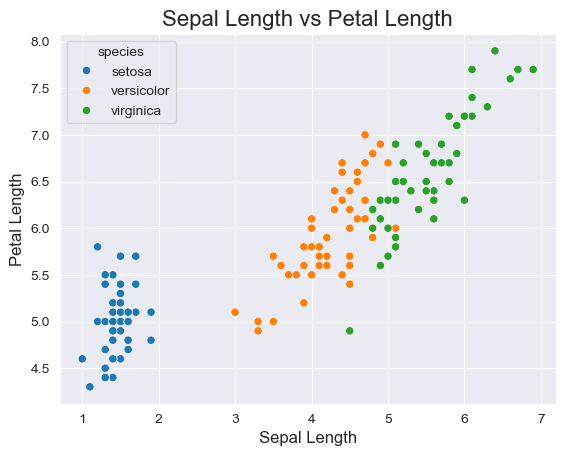

In [110]:
avg_petal_length = iris.groupby('species')['petal_length'].mean()
print(f'Average petal length for each species:\n{avg_petal_length}\n')

flower_count = iris['species'].value_counts()
print(f'Count of flowers for each species:\n{flower_count}\n')

graph = sns.scatterplot(x = 'petal_length', y = 'sepal_length', hue = 'species', data = iris)
graph.set_title('Sepal Length vs Petal Length', fontsize = 16)
graph.set_xlabel('Sepal Length', fontsize = 12)
graph.set_ylabel('Petal Length', fontsize = 12)
plt.show()

# 7. Matplotlib: Basic Plotting Questions

**Q1. Line Plot**

Plot a sine wave (\(y = sin(x)\)) for \(x in [0, 2π]\). Customize the plot by:
1. Adding a title to the graph.
2. Adding labels for the x-axis and y-axis.
3. Displaying a grid.

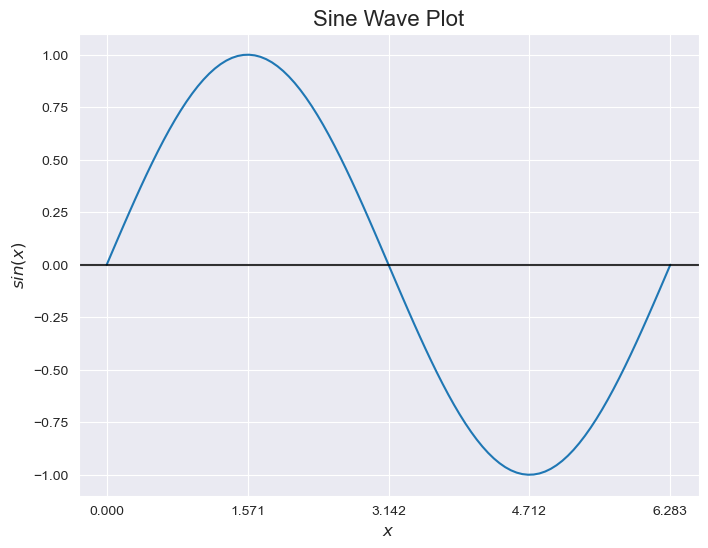

In [114]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x, y)
ax.set_title('Sine Wave Plot', fontsize = 16)
ax.set_xlabel(r'$x$', fontsize = 12)
ax.set_ylabel(r'$sin(x)$', fontsize = 12)
ax.grid(True)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.axhline(y = 0, color = 'black', alpha = 0.8)

plt.show()


**Q2. Multiple Line Plots**

Plot the following functions on the same graph for \(x \in [0, 2π]\):
1. \(y_1 = sin(x)\)
2. \(y_2 = cos(x)\)
Customize the graph by:
- Using different colors and line styles for each function.
- Adding a legend to identify the curves.

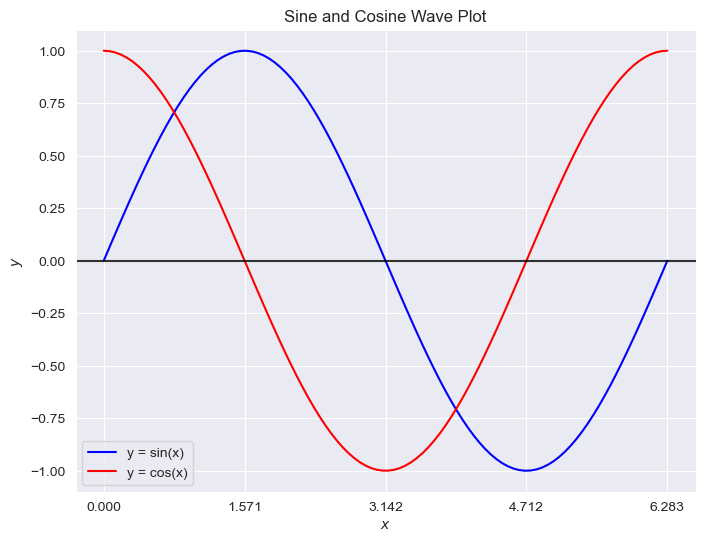

In [113]:
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y1, color='blue', linestyle='-', label='y = sin(x)')
ax.plot(x, y2, color='red', linestyle='-', label='y = cos(x)')
ax.set_title('Sine and Cosine Wave Plot')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.axhline(y = 0, color = 'black', alpha = 0.8)

plt.show()

**Q3. Plot Customization**

Plot the function \(y = x^2\) for \(x \in [-10, 10]\). Customize the plot by:
1. Adding a title and axis labels.
2. Changing the line style, color, and thickness.
3. Adjusting the axis limits to make the graph more visually appealing.

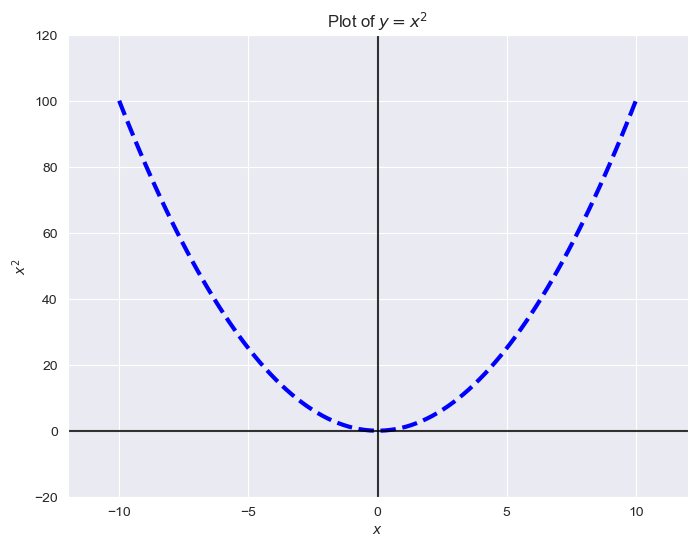

In [116]:
x = np.linspace(-10, 10, 100)
y = x**2

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, color='blue', linestyle='--', linewidth=3)
ax.set_title(r'Plot of $y = x^2$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$x^2$')
ax.set_xlim(-12, 12)
ax.set_ylim(-20, 120)
ax.axhline(y = 0, color = 'black', alpha = 0.8)
ax.axvline(x = 0, color = 'black', alpha = 0.8)
plt.show()

# 8a. Bar Plot

**Q1** You are provided with the `tips` dataset. Your task is to create a **bar plot** using Matplotlib.

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
```
- Create a bar plot showing the average tip for each day of the week.
Label the x-axis as Day, the y-axis as Average Tip, and add a title: "Average Tip by Day".

- Based on the bar plot, which day has the highest average tip?


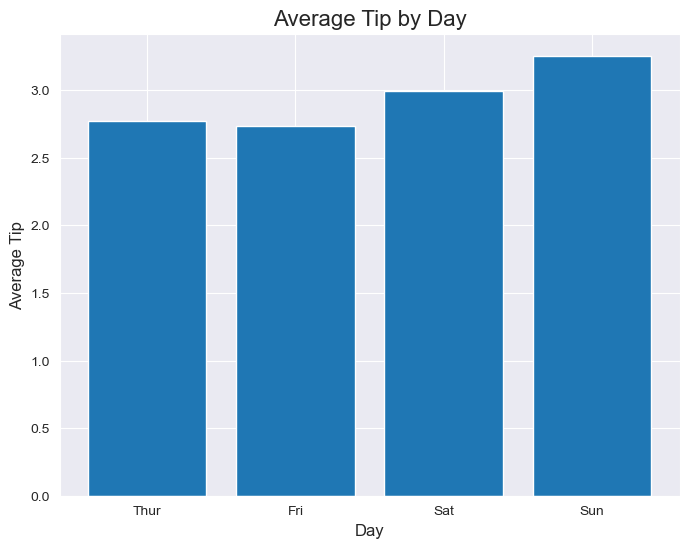

Based on the bar plot, the day with the highest average tip is Sunday


In [117]:
tips = sns.load_dataset('tips')

avg_tip_by_day = tips.groupby('day')['tip'].mean()
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(avg_tip_by_day.index, avg_tip_by_day.values)
ax.set_title('Average Tip by Day', fontsize = 16)
ax.set_xlabel('Day', fontsize = 12)
ax.set_ylabel('Average Tip', fontsize = 12)
plt.show()

print(f'Based on the bar plot, the day with the highest average tip is {avg_tip_by_day.idxmax()}day')

# 8b. Scatter Plot

**Q1.** You are provided with the `tips` dataset. Your task is to create a **scatter plot** using Matplotlib.

- Load the `tips` dataset using Seaborn:  
  ```python
  import seaborn as sns
  tips = sns.load_dataset('tips')
  ```

- Create a scatter plot with total_bill on the x-axis and tip on the y-axis.
- Label the x-axis as Total Bill, the y-axis as Tip, and add a title: "Relationship between Total Bill and Tip".

- Based on the scatter plot, do you observe any relationship between total_bill and tip?


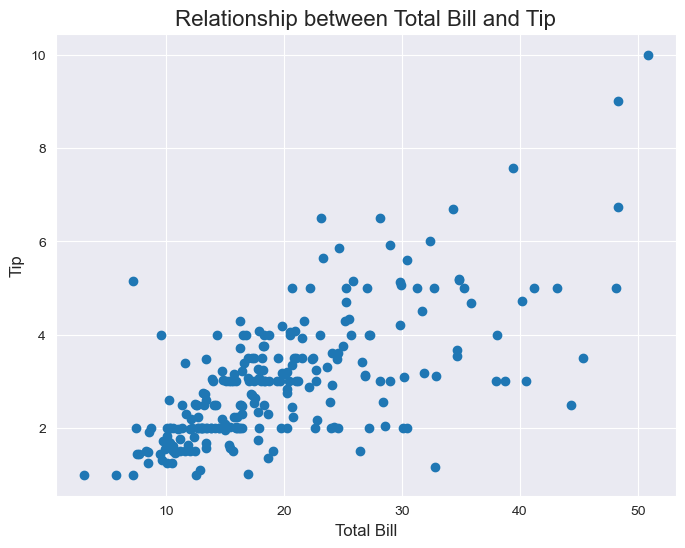

Based on the scatter plot, we can see that as the total bill increases, the tip also increases. I think this is due to the fact that customers generally tip a certain percentage of the total bill amount. However it is not exactly linear, and there are many outliers.


In [118]:
tips = sns.load_dataset('tips')

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(tips['total_bill'], tips['tip'])
ax.set_title('Relationship between Total Bill and Tip', fontsize = 16)
ax.set_xlabel('Total Bill', fontsize = 12)
ax.set_ylabel('Tip', fontsize = 12)
plt.show()
print('Based on the scatter plot, we can see that as the total bill increases, the tip also increases. I think this is due to the fact that customers generally tip a certain percentage of the total bill amount. However it is not exactly linear, and there are many outliers.')

# 9. Matplotlib: Subplots and Layouts

**Q1.** Create a 2x2 grid of subplots with:
- Subplot (1,1): Plot y = sin(x).
- Subplot (1,2): Plot y = cos(x) .
- Subplot (2,1): Plot y = e<sup>−x</sup>
- Subplot (2,2): Plot y=ln(x) for x∈[0.1,2].

Customize background colors, add unique x and y labels, and set titles.

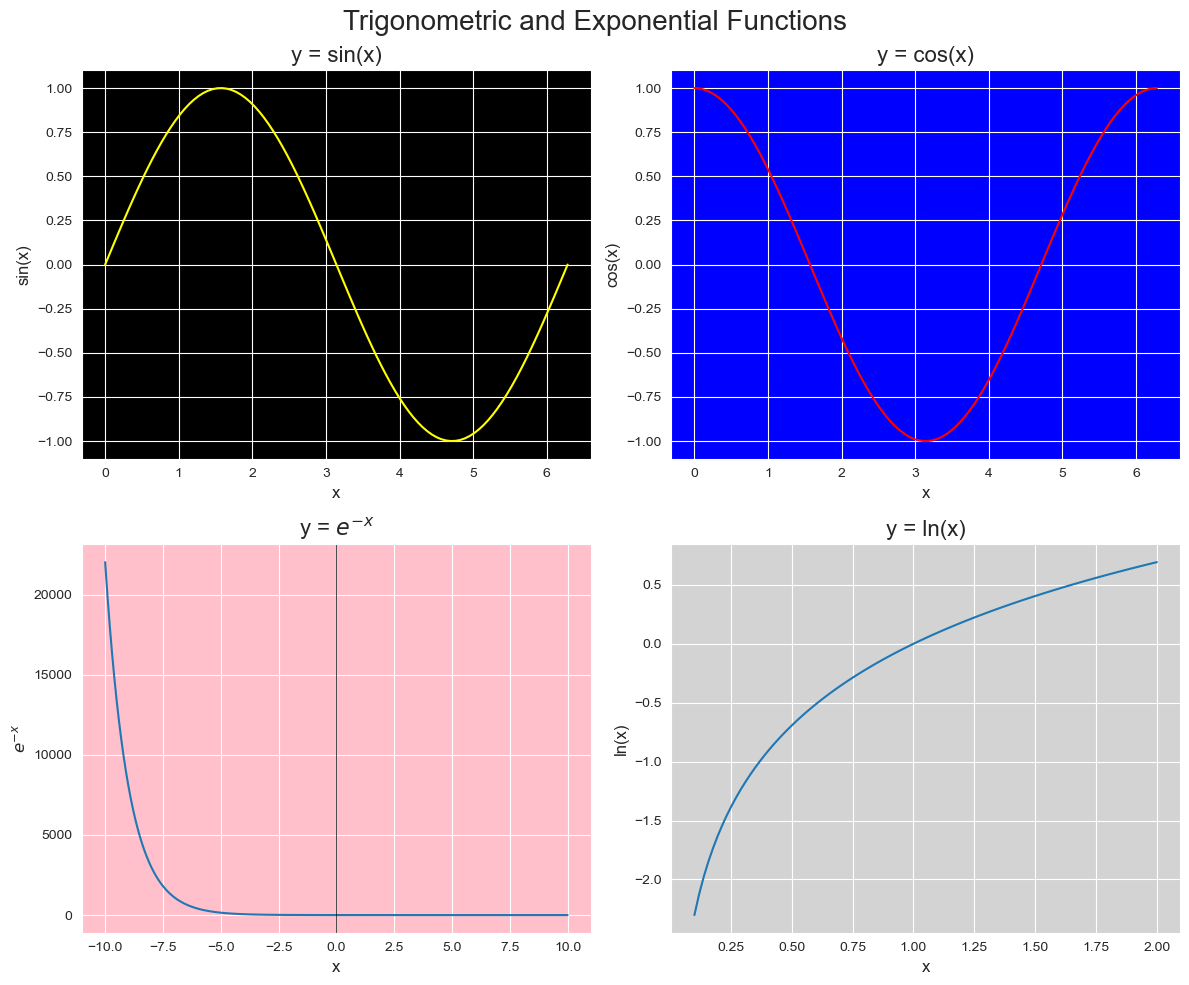

In [119]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

fig.suptitle('Trigonometric and Exponential Functions', fontsize = 20)

x1 = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x1)
ax[0, 0].plot(x1, y1, color = 'yellow')
ax[0, 0].set_title('y = sin(x)', fontsize = 16)
ax[0, 0].set_xlabel('x', fontsize = 12)
ax[0, 0].set_ylabel('sin(x)', fontsize = 12)
ax[0, 0].set_facecolor('black')

x2 = np.linspace(0, 2*np.pi, 100)
y2 = np.cos(x2)
ax[0, 1].plot(x2, y2, color = 'red')
ax[0, 1].set_title('y = cos(x)', fontsize = 16)
ax[0, 1].set_xlabel('x', fontsize = 12)
ax[0, 1].set_ylabel('cos(x)', fontsize = 12)
ax[0, 1].set_facecolor('blue')

x3 = np.linspace(-10,10,1000)
y3 = np.exp(-x3)
ax[1, 0].plot(x3, y3)
ax[1, 0].set_title(r'y = $e^{-x}$', fontsize = 16)
ax[1, 0].set_xlabel('x', fontsize = 12)
ax[1, 0].set_ylabel(r'$e^{-x}$', fontsize = 12)
ax[1, 0].set_facecolor('pink')
ax[1, 0].axvline(x=0, color='black', linewidth=0.5)

x4 = np.linspace(0.1, 2, 100)
y4 = np.log(x4)
ax[1, 1].plot(x4, y4)
ax[1, 1].set_title(r'y = ln(x)', fontsize = 16)
ax[1, 1].set_xlabel('x', fontsize = 12)
ax[1, 1].set_ylabel(r'ln(x)', fontsize = 12)
ax[1, 1].set_facecolor('lightgrey')

plt.tight_layout()
plt.show()

**Q2.** Create a subplot within another subplot:
- Main subplot: Display a scatter plot of 100 random points with x and y values between 0 and 1.
- Inset subplot: Display a histogram of the x-values from the scatter plot.

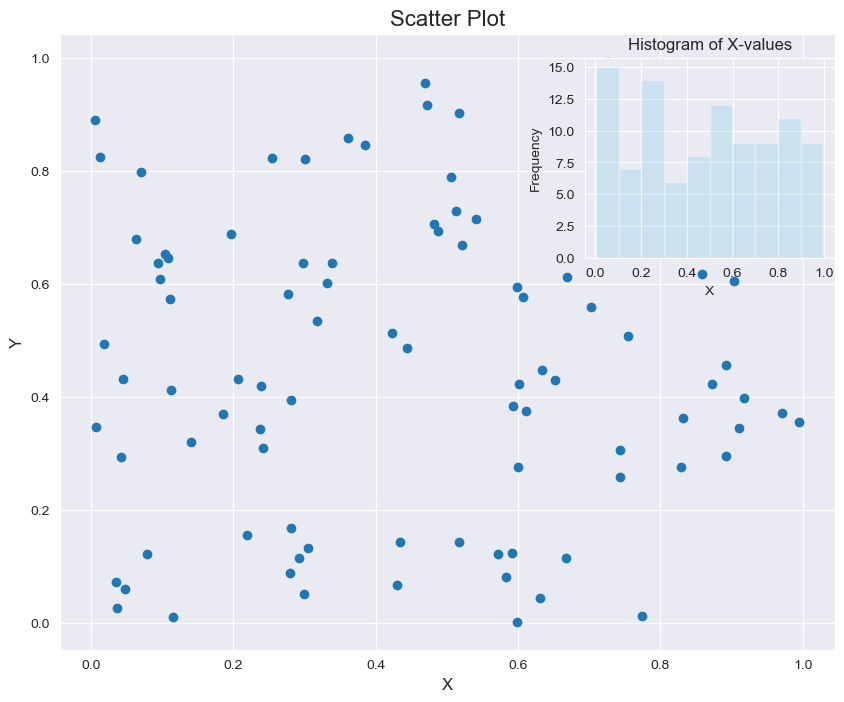

In [132]:
x = np.random.rand(100)
y = np.random.rand(100)

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y)
ax.set_title('Scatter Plot', fontsize = 16)
ax.set_xlabel('X', fontsize = 12)
ax.set_ylabel('Y', fontsize = 12)


left, bottom, width, height = [0.65, 0.6, 0.25, 0.25]
ax_inset = fig.add_axes([left, bottom, width, height])
ax_inset.hist(x, bins = 10, color = 'skyblue', alpha = 0.3)
ax_inset.set_title('Histogram of X-values', fontsize = 12)
ax_inset.set_xlabel('X', fontsize = 10)
ax_inset.set_ylabel('Frequency', fontsize = 10)

plt.show()

**Q3.** Create a Layout with One Large and Two Smaller Subplots

- Design a large subplot occupying the top two-thirds of the figure and plot \( y = sin(x) \) and \( y = cos(x) \) on the same graph.

- Create two smaller subplots in the bottom row:
   - On the left, plot y =x<sup>2</sup>.
   - On the right, plot y = e<sup>x</sup>.

Ensure each subplot has appropriate titles, axis labels, and legends where necessary. Use a clean layout that avoids overlapping elements.

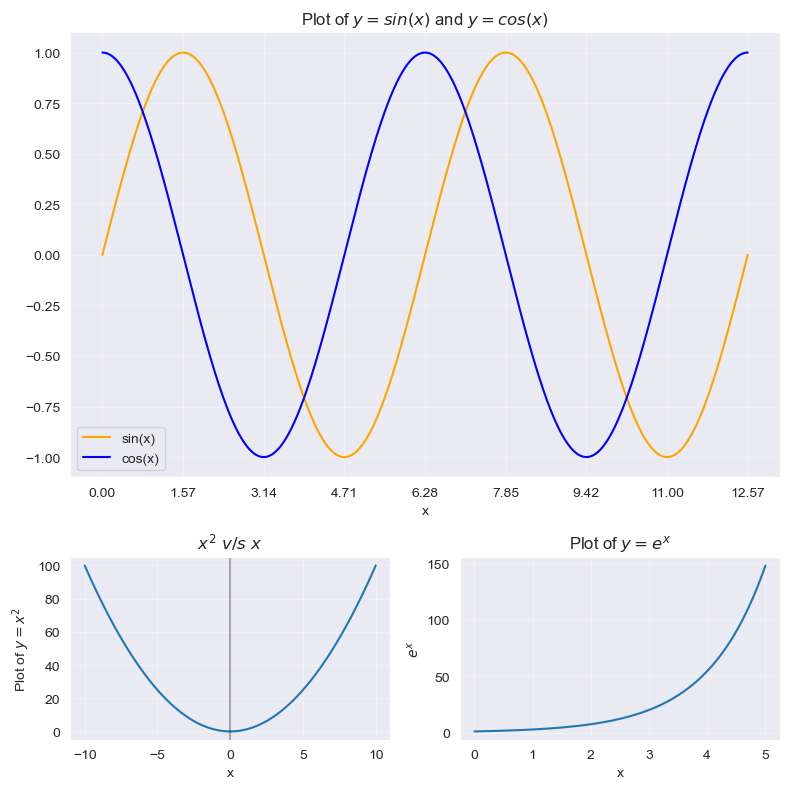

In [138]:
x_1 = np.linspace(0, 4 * np.pi, 1000)
y_sin = np.sin(x_1)
y_cos = np.cos(x_1)

x_sq = np.linspace(-10, 10, 1000)
y_sq = x_sq ** 2

x_exp = np.linspace(0, 5, 1000)
y_exp = np.exp(x_exp)

fig = plt.figure(figsize = (8, 8))
gs = fig.add_gridspec(3, 2)

ax_1 = fig.add_subplot(gs[:2, :])
ax_1.plot(x_1, y_sin, color = 'orange', label = "sin(x)")
ax_1.plot(x_1, y_cos, color = 'blue', label = "cos(x)")
ax_1.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax_1.grid(True, alpha = 0.3)
ax_1.set_title(r"Plot of $y = sin(x)$ and $y = cos(x)$")
ax_1.set_xlabel("x")
ax_1.legend()

ax_2 = fig.add_subplot(gs[2, 0])
ax_2.plot(x_sq, y_sq)
ax_2.set_title(r"$x^2\ v/s\ x$")
ax_2.set_xlabel("x")
ax_2.set_ylabel("Plot of $y = x^2$")
ax_2.grid(True, alpha = 0.3)
ax_2.axvline(x = 0, color = 'black', alpha = 0.3)

ax_3 = fig.add_subplot(gs[2, 1])
ax_3.plot(x_exp, y_exp)
ax_3.grid(True, alpha = 0.3)
ax_3.set_title(r"Plot of $y = e^x$")
ax_3.set_xlabel("x")
ax_3.set_ylabel("$e^x$")

fig.tight_layout()

# 10. Matplotlib: Advanced Customization

**Q1. Customizing Axes and Ticks**

Create a line plot for y = x^2 in the range -10 to 10.
Customize the axes and ticks:
1. Set x-axis range to -10 to 10.
2. Set y-axis range to 0 to 100.
3. Use custom tick marks at intervals of 2 for x-axis and 10 for y-axis.
4. Rotate x-axis tick labels by 45 degrees.


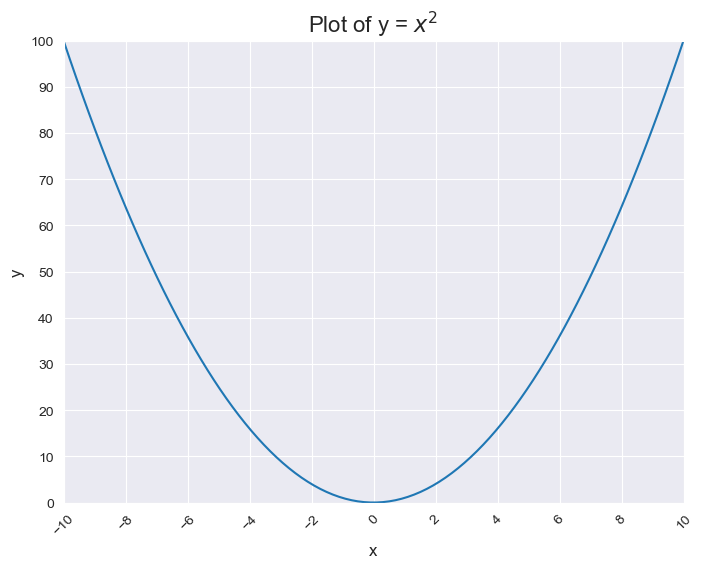

In [3]:
x = np.linspace(-10, 10, 100)
y = x**2

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 100)
ax.set_title(r'Plot of y = $x^2$', fontsize = 16)
ax.set_xlabel('x', fontsize = 12)
ax.set_ylabel('y', fontsize = 12)
ax.set_xticks(np.arange(-10, 11, 2))
ax.set_yticks(np.arange(0, 101, 10))
ax.tick_params(axis = 'x', rotation = 45)
plt.show()

**Q2. Multiple Subplots with Shared Legend and Grid Customization**

Create a figure with four subplots (2x2 grid) showing different trigonometric functions:
1. Top-left: y = sin(x)
2. Top-right: y = cos(x)
3. Bottom-left: y = tan(x) (restrict x to avoid undefined regions).
4. Bottom-right: y = sin^2(x) + cos^2(x) (should always equal 1).

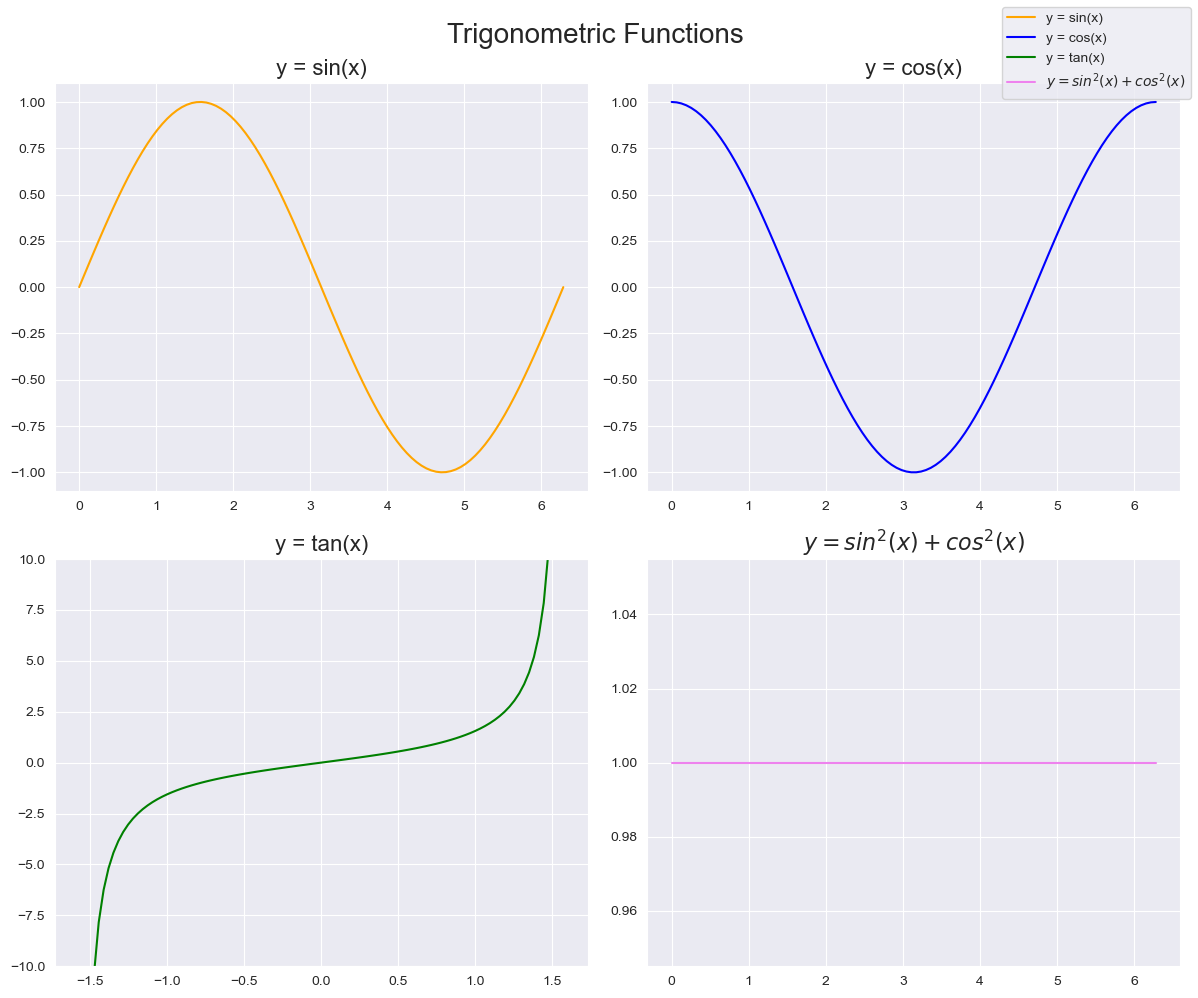

In [22]:
x = np.linspace(0, 2*np.pi, 100)
x_tan = np.linspace(-np.pi/2 + 0.0000001, np.pi/2 - 0.0000001, 100)

y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x_tan)
y4 = np.sin(x)**2 + np.cos(x)**2

fig, ax = plt.subplots(2, 2, figsize = (12, 10))
fig.suptitle('Trigonometric Functions', fontsize = 20)

l1 = ax[0, 0].plot(x, y1, color = 'orange')
ax[0, 0].set_title('y = sin(x)', fontsize = 16)

l2 = ax[0, 1].plot(x, y2, color = 'blue')
ax[0, 1].set_title('y = cos(x)', fontsize = 16)

l3 = ax[1, 0].plot(x_tan, y3, color = 'green')
ax[1, 0].set_title('y = tan(x)', fontsize = 16)
ax[1, 0].set_ylim(-10, 10)

l4 = ax[1, 1].plot(x, y4, color = 'violet')
ax[1, 1].set_title(r'$y = sin^2(x) + cos^2(x)$', fontsize = 16)

labels = ('y = sin(x)', 'y = cos(x)', 'y = tan(x)', r'$y = sin^2(x) + cos^2(x)$')
fig.legend((*l1, *l2, *l3, *l4), labels, loc = 'upper right')

plt.tight_layout()
plt.show()

**Q3. Subplots and Shared Axes**

Create two subplots side-by-side:
1. Bar chart for sales (random data) from January to June.
2. Line chart for cumulative sales.
Share the y-axis and add titles, a common x-axis label, and a grid for the second plot.

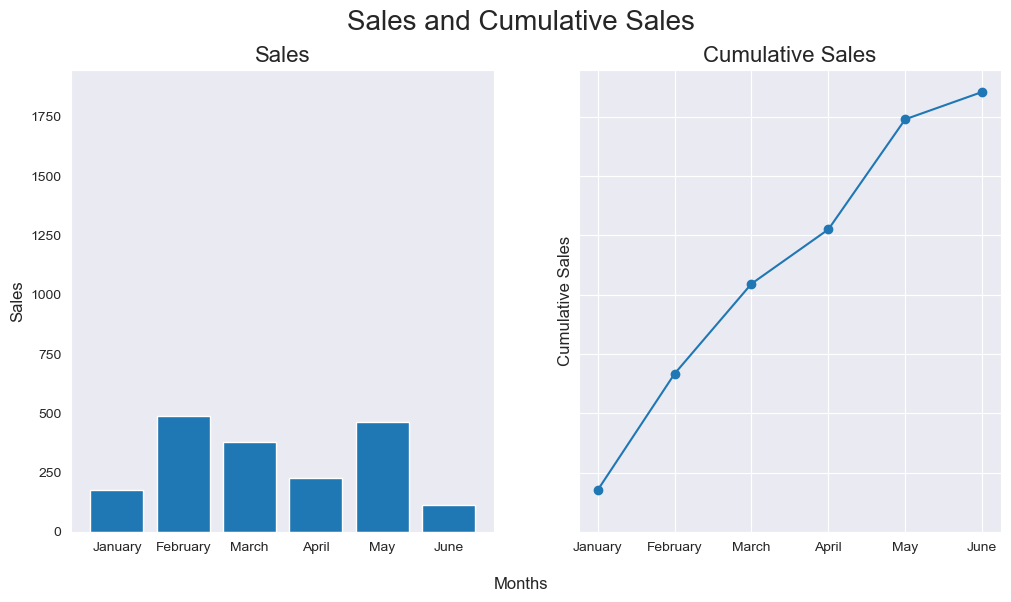

In [23]:
sales = np.random.randint(100, 1000, 6)
cumulative_sales = np.cumsum(sales)
months = ['January', 'February', 'March', 'April', 'May', 'June']

fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)
fig.suptitle('Sales and Cumulative Sales', fontsize = 20)

ax[0].bar(months, sales)
ax[0].set_title('Sales', fontsize = 16)
ax[0].set_ylabel('Sales', fontsize = 12)
ax[0].grid(False)

ax[1].plot(months, cumulative_sales, marker = 'o')
ax[1].set_title('Cumulative Sales', fontsize = 16)
ax[1].set_ylabel('Cumulative Sales', fontsize = 12)
ax[1].grid(True)

fig.supxlabel('Months', fontsize = 12)

plt.show()

**Q4. Adding Annotations**

Create a scatter plot of 10 random points:
1. Annotate the point with the max y-coordinate with a red star and text label.
2. Customize marker size and color for all points.

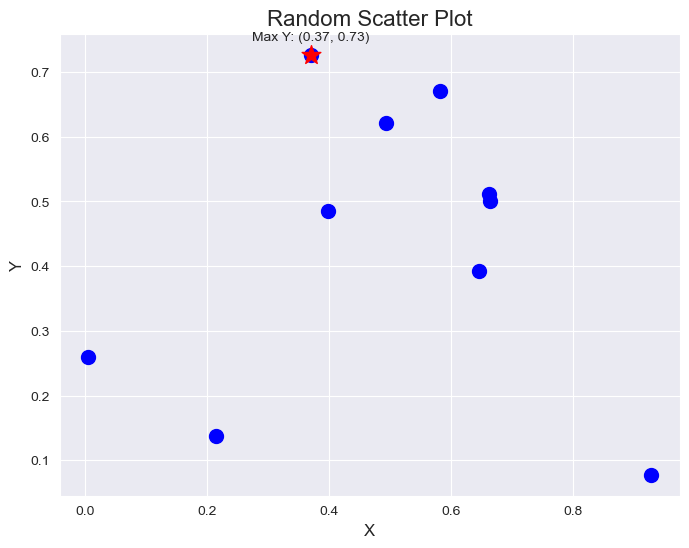

In [41]:
x = np.random.rand(10)
y = np.random.rand(10)

fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(x, y, s = 100, c = 'blue')
ax.set_title('Random Scatter Plot', fontsize = 16)
ax.set_xlabel('X', fontsize = 12)
ax.set_ylabel('Y', fontsize = 12)

max_y = np.argmax(y)
ax.scatter(x[max_y], y[max_y], s = 200, c = 'red', marker = '*')
ax.annotate(f'Max Y: ({x[max_y]:.2f}, {y[max_y]:.2f})', (x[max_y], y[max_y]), textcoords = 'offset points', xytext = (0, 10), ha = 'center')

plt.show()

**Q5. Creating a Custom Colormap**

Generate a heatmap for a 5x5 matrix of random numbers between 0 and 1:
1. Use a custom colormap (blue to red).
2. Add a color bar and display exact cell values rounded to 2 decimals.

<Axes: >

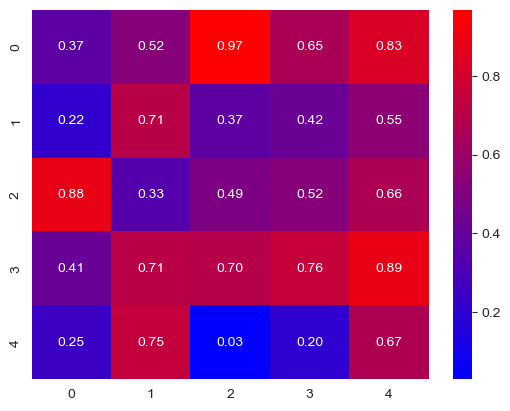

In [42]:
from matplotlib.colors import LinearSegmentedColormap

matrix = np.random.rand(5, 5)

color_map = LinearSegmentedColormap.from_list("", ["blue", "red"])
sns.heatmap(matrix, cmap = color_map, annot = True, fmt = ".2f")

**Q6. Customization of 3D Plot**

Using Matplotlib’s mpl_toolkits.mplot3d, create a 3D surface plot for the function:
z = sin(sqrt(x^2 + y^2))

Requirements:
1. Generate x and y values in the range -5 to 5 using a meshgrid.
2. Use a custom colormap that highlights peaks and valleys (e.g., `coolwarm`).
3. Add a color bar with a label "Amplitude".
4. Add labels for all three axes and a title.
5. Rotate the 3D plot to a custom viewing angle using ax.view_init.

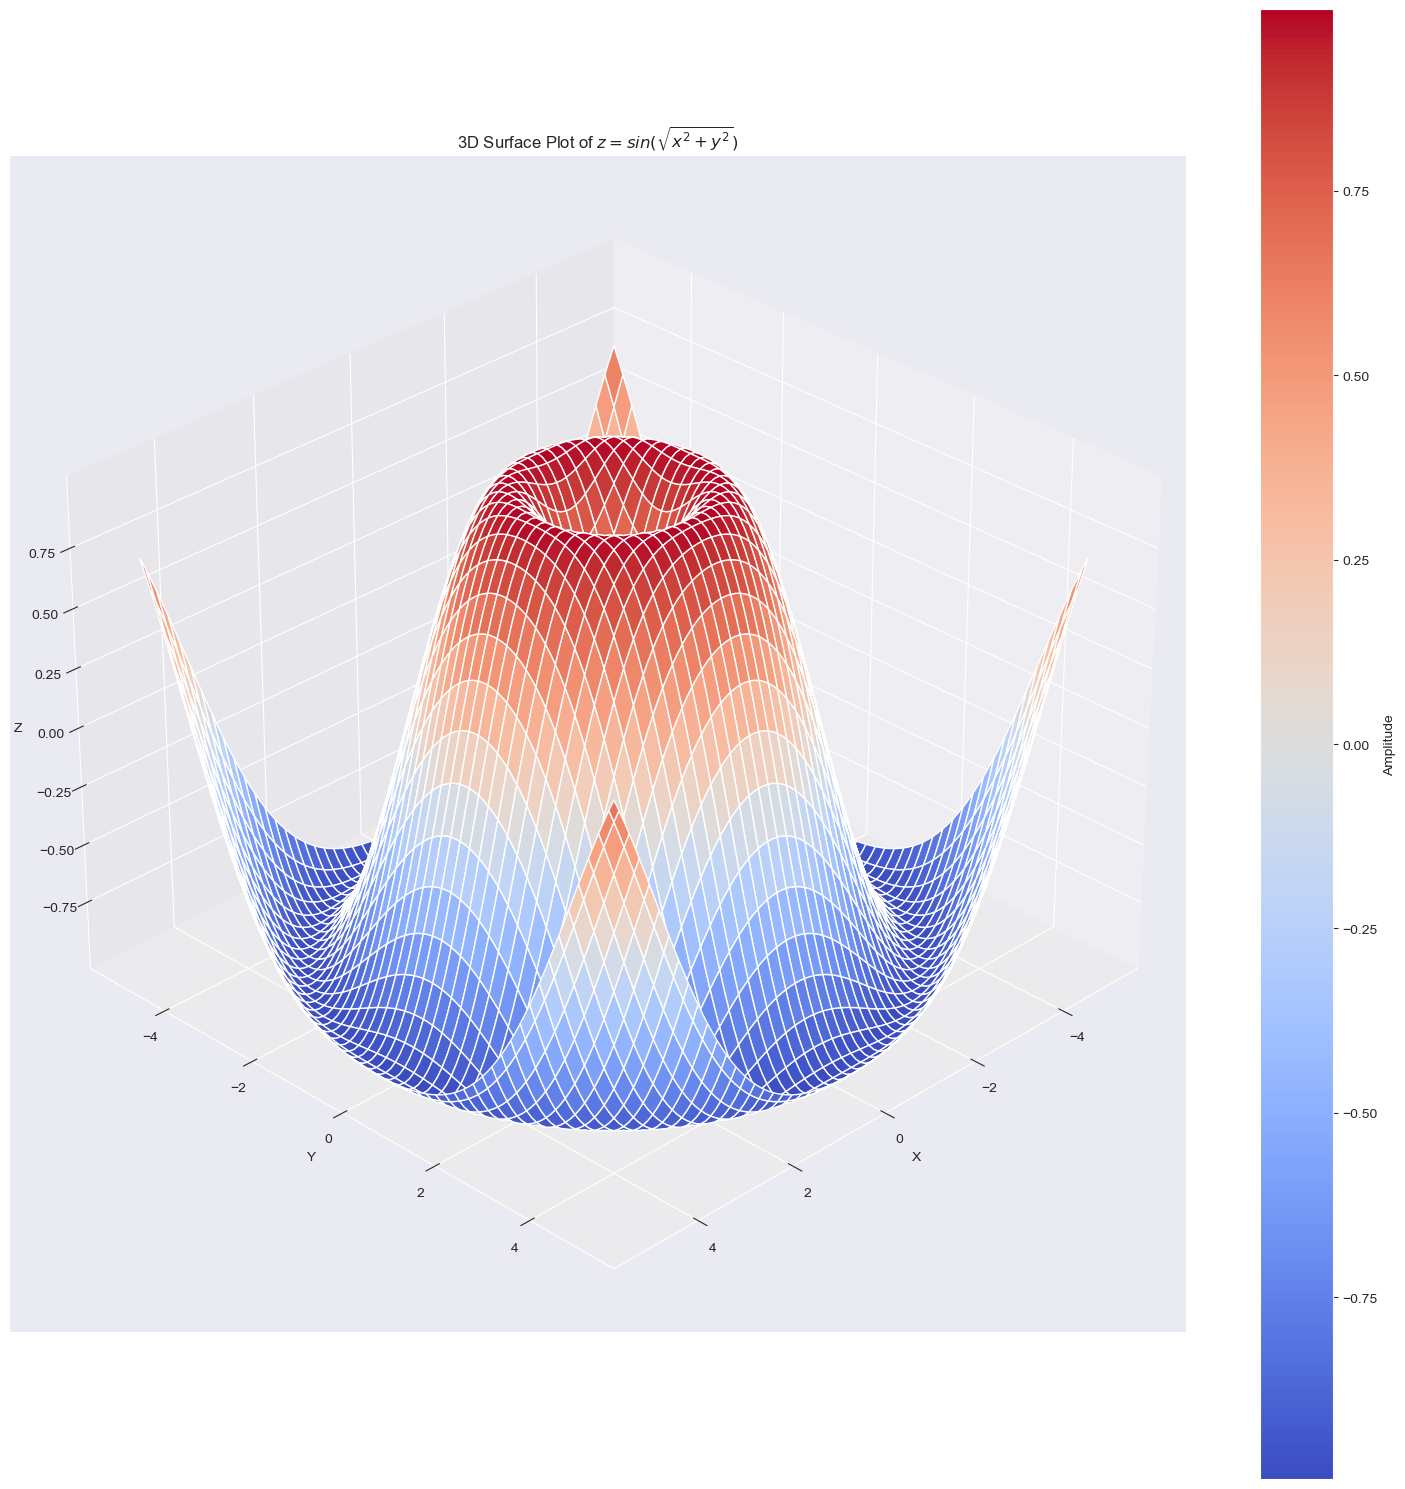

In [60]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

z = np.sin(np.sqrt(x**2 + y**2))

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection = '3d')
surf = ax.plot_surface(x, y, z, cmap = 'coolwarm')
fig.colorbar(surf, ax = ax, label = 'Amplitude')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(r'3D Surface Plot of $z = sin(\sqrt{x^2 + y^2})$')
ax.view_init(elev = 30, azim = 45)

fig.tight_layout()
plt.show()